In [61]:
import matplotlib.pyplot as plt
import re
import statistics

In [62]:
QUICKHULL_GPU_WITH_DATA_FILENAME = "data/quickhull_gpu_with_data.txt"
QUICKHULL_GPU_NO_DATA_FILENAME = "data/quickhull_gpu_no_data.txt"
QUICKHULL_CPU_WITH_DATA_FILENAME = "data/quickhull_cpu.txt"
plt.style.use("seaborn")

In [125]:
def parse_computation_times(filename):
    with open(filename, mode="r") as file_stream:
        computation_lines = list(file_stream.readlines())
        return [
            float(re.search(pattern=":\s(.*)\sms", string=line).group(1))
            for line in computation_lines
        ]

    
def smooth_values(values, smoothing_range):
    return [
        statistics.mean(values[max(0, i - smoothing_range + 1):(i + 1)])
        for i in range(len(values))
    ]


def plot_times(filenames, title, legend, smoothing_range=5):
    plt.figure(figsize=(12, 8))    
    plt.title(title)
    for filename in filenames:
        values = parse_computation_times(filename)
        values = smooth_values(values, smoothing_range)    
        plt.plot(values)
    plt.legend(legend)
    plt.xlabel("Liczba punktów")
    plt.xticks(ticks=[10 * i for i in range(11)], labels=[str(100000 * i) for i in range(11)])
    plt.ylabel("Czas obliczeń (ms)")
    

def plot_relative_times(filename1, filename2, title, smoothing_range=5):
    plt.figure(figsize=(12, 8))    
    plt.title(title)
    values1 = smooth_values(parse_computation_times(filename1), smoothing_range)
    values2 = smooth_values(parse_computation_times(filename2), smoothing_range)
    values = [value1 / value2 for value1, value2 in zip(values1, values2)]
    plt.plot(values)
    plt.xlabel("Liczba punktów")
    plt.xticks(ticks=[10 * i for i in range(11)], labels=[str(100000 * i) for i in range(11)])
    plt.ylabel("Relatywny czas obliczeń")

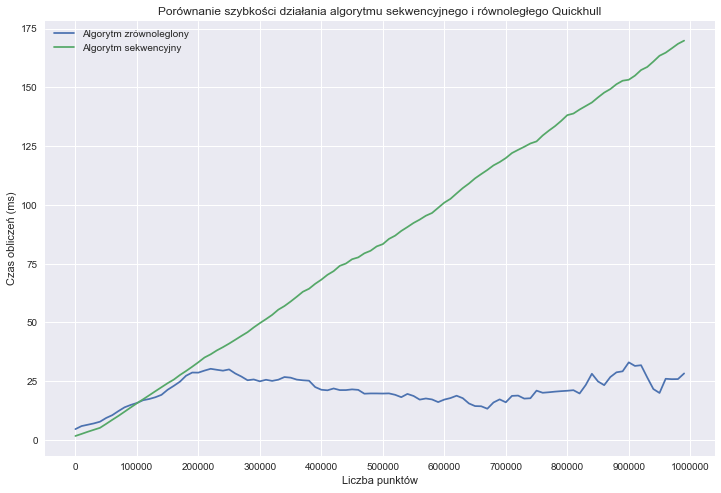

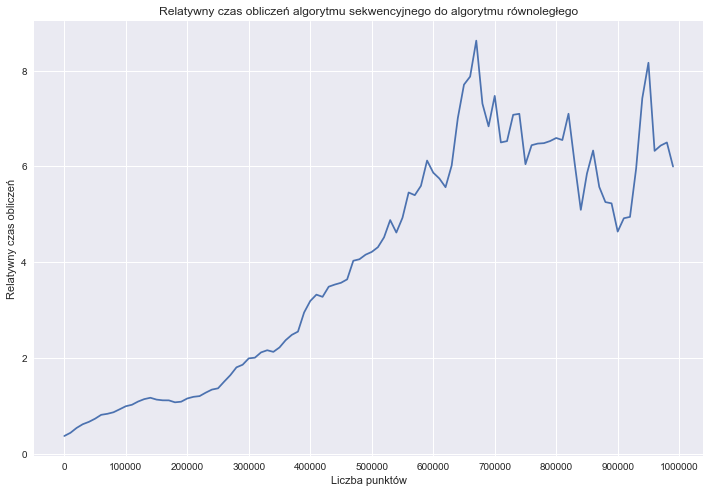

In [128]:
filenames = [QUICKHULL_GPU_NO_DATA_FILENAME, QUICKHULL_CPU_WITH_DATA_FILENAME]
plot_times(
    filenames,
    title="Porównanie szybkości działania algorytmu sekwencyjnego i równoległego Quickhull",
    legend=["Algorytm zrównoleglony", "Algorytm sekwencyjny"]
)
plot_relative_times(
    filenames[1],
    filenames[0],
    title="Relatywny czas obliczeń algorytmu sekwencyjnego do algorytmu równoległego"
)